## Building our own perceptron learner

Here, we will see an implementation of perceptron learning, from scratch, on a synthetic classification data-set.

In [1]:
# imports and setup
from random import random
import numpy as np

from sklearn.datasets import make_classification

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=3)

### Define initial weights
Here, we set each initial weight randomly as $w_i \in (-1, 1)$.

In [2]:
def random_weight():
    weight = random()
    if (random() < 0.5):
        weight = -weight
    return weight

### Define the separator line, given weights
In general, given $\mathbf{w} = (w_0, w_1, \ldots, w_n)$ we want to define the separator line using the basic linear solution $\mathbf{w} \cdot \mathbf{x} = 0$.

Assuming two-dimensional data: $\mathbf{x} = (x_1, x_2) \qquad \mathbf{w} = (w_0, w_1, w_2)$

The equation of interest is: $w_0 + w_1 x_1 + w_2 x_2 = 0$

We can then use basic algebra to solve for the $x_1$ and $x_2$ intercepts: 
$x_1^i = -w_0 / w_1 \qquad x_2^i = -w_0 / w_2$

Solving for the slope of the line between the intercepts gives us the separator: 
$x_2 = -(w_1/w_2)x_1 + -(w_0/w_2)$

In [3]:
def define_separator(weights):
    slope = -(weights[1] / weights[2])
    intercept = -(weights[0] / weights[2]) 
    return slope, intercept

### Build simple prediction function
For the perceptron, given a set of weights $\mathbf{w}$, we simply compute the linear sum $\mathbf{w} \cdot \mathbf{x}$, and use the threshold hypothesis function:
$$h_\mathbf{w} =
\begin{cases}
    1 & \mathbf{w} \cdot \mathbf{x} \geq 0 \\
    0 & \text{else } (\mathbf{w} \cdot \mathbf{x} < 0)
\end{cases}
$$

### Perceptron learning with one-item stochastic updates
The learning algorithm iterates until it either has a perfect linear separator, or until it reaches some maximum number of iterations.  (You could play with that parameter, as well as the value of the learning rate `alpha`, including making the latter adaptive, diminishing over time.)

On each iteration, we take some misclassified element $\mathbf{x}_i$ and then update each weight using:
$$w_j \leftarrow w_j + \alpha(y_i - h_\mathbf{w}(\mathbf{x}_i)) \times x_{i,j}$$
(and remembering that we treat the bias weight $w_0$ as if there is some dummy feature $x_0 = 1$).

### Create simple dataset   
We create a simple two-dimensional data-set of 50 points $\mathbf{x} = (x_1, x_2)$, using the `sklearn` function `make_classification`.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

This is pretty self-explanatory; the data is randomized into classes with numeric labels starting at 0, and the `class_sep` parameter controls how easy it is to separate 

In [4]:
x_N, y_N = make_classification(n_samples=50, n_features=2, n_redundant=0, 
                               n_clusters_per_class=1, class_sep=1.1)
class0_x_N = x_N[y_N==0]
class1_x_N = x_N[y_N==1]

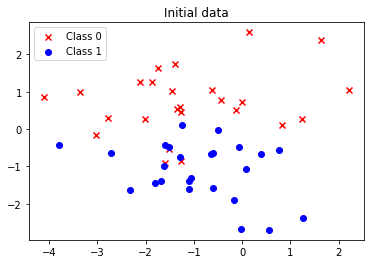

In [5]:
plt.scatter(class0_x_N[:,0], class0_x_N[:,1], c='r', marker='x', label='Class 0')
plt.scatter(class1_x_N[:,0], class1_x_N[:,1], c='b', marker='o', label='Class 1')
plt.legend()
plt.title("Initial data");